In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir


Bad key "text.kerning_factor" on line 4 in
c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [3]:
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [4]:
df1 = pd.read_csv('./MovementAAL/dataset/MovementAAL_RSS_1.csv')
df2 = pd.read_csv('./MovementAAL/dataset/MovementAAL_RSS_2.csv')

In [5]:
df1.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.90476,-0.48,0.28571,0.30
1,-0.57143,-0.32,0.14286,0.30
2,-0.38095,-0.28,-0.14286,0.35
3,-0.28571,-0.20,-0.47619,0.35
4,-0.14286,-0.20,0.14286,-0.20


In [6]:
df2.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.57143,-0.20,0.71429,0.50
1,-0.76190,-0.48,0.76190,-0.25
2,-0.85714,-0.60,0.85714,0.55
3,-0.76190,-0.40,0.71429,0.60
4,-0.76190,-0.84,0.85714,0.45


In [7]:
df1.shape

(27, 4)

In [8]:
df2.shape

(26, 4)

In [9]:
path = './MovementAAL/dataset/MovementAAL_RSS_'
sequences = list()
for i in range(1,315):
    file_path = path + str(i) + '.csv'
    print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values)

./MovementAAL/dataset/MovementAAL_RSS_1.csv
./MovementAAL/dataset/MovementAAL_RSS_2.csv
./MovementAAL/dataset/MovementAAL_RSS_3.csv
./MovementAAL/dataset/MovementAAL_RSS_4.csv
./MovementAAL/dataset/MovementAAL_RSS_5.csv
./MovementAAL/dataset/MovementAAL_RSS_6.csv
./MovementAAL/dataset/MovementAAL_RSS_7.csv
./MovementAAL/dataset/MovementAAL_RSS_8.csv
./MovementAAL/dataset/MovementAAL_RSS_9.csv
./MovementAAL/dataset/MovementAAL_RSS_10.csv
./MovementAAL/dataset/MovementAAL_RSS_11.csv
./MovementAAL/dataset/MovementAAL_RSS_12.csv
./MovementAAL/dataset/MovementAAL_RSS_13.csv
./MovementAAL/dataset/MovementAAL_RSS_14.csv
./MovementAAL/dataset/MovementAAL_RSS_15.csv
./MovementAAL/dataset/MovementAAL_RSS_16.csv
./MovementAAL/dataset/MovementAAL_RSS_17.csv
./MovementAAL/dataset/MovementAAL_RSS_18.csv
./MovementAAL/dataset/MovementAAL_RSS_19.csv
./MovementAAL/dataset/MovementAAL_RSS_20.csv
./MovementAAL/dataset/MovementAAL_RSS_21.csv
./MovementAAL/dataset/MovementAAL_RSS_22.csv
./MovementAAL/datas

./MovementAAL/dataset/MovementAAL_RSS_224.csv
./MovementAAL/dataset/MovementAAL_RSS_225.csv
./MovementAAL/dataset/MovementAAL_RSS_226.csv
./MovementAAL/dataset/MovementAAL_RSS_227.csv
./MovementAAL/dataset/MovementAAL_RSS_228.csv
./MovementAAL/dataset/MovementAAL_RSS_229.csv
./MovementAAL/dataset/MovementAAL_RSS_230.csv
./MovementAAL/dataset/MovementAAL_RSS_231.csv
./MovementAAL/dataset/MovementAAL_RSS_232.csv
./MovementAAL/dataset/MovementAAL_RSS_233.csv
./MovementAAL/dataset/MovementAAL_RSS_234.csv
./MovementAAL/dataset/MovementAAL_RSS_235.csv
./MovementAAL/dataset/MovementAAL_RSS_236.csv
./MovementAAL/dataset/MovementAAL_RSS_237.csv
./MovementAAL/dataset/MovementAAL_RSS_238.csv
./MovementAAL/dataset/MovementAAL_RSS_239.csv
./MovementAAL/dataset/MovementAAL_RSS_240.csv
./MovementAAL/dataset/MovementAAL_RSS_241.csv
./MovementAAL/dataset/MovementAAL_RSS_242.csv
./MovementAAL/dataset/MovementAAL_RSS_243.csv
./MovementAAL/dataset/MovementAAL_RSS_244.csv
./MovementAAL/dataset/MovementAAL_

In [10]:
len(sequences)

314

In [11]:
targets = pd.read_csv('./MovementAAL/dataset/MovementAAL_target.csv')
targets = targets.values[:,1]

In [12]:
#sequences[313]

array([[-0.72727 , -1.      , -0.066667,  0.06383 ],
       [-0.45455 , -0.6     ,  0.066667,  0.06383 ],
       [-0.27273 , -0.77778 , -0.11111 ,  0.06383 ],
       [-0.36364 , -0.82222 , -0.86667 ,  0.06383 ],
       [-0.36364 , -0.73333 ,  0.33333 ,  0.06383 ],
       [-0.36364 , -0.33333 ,  0.066667,  0.53191 ],
       [-0.36364 , -0.6     ,  0.2     ,  0.65957 ],
       [-0.36364 , -0.46667 , -0.022222,  0.61702 ],
       [-0.36364 , -0.6     ,  0.15556 ,  0.65957 ],
       [-0.36364 , -0.82222 ,  0.33333 ,  0.53191 ],
       [-0.68182 , -0.33333 ,  0.33333 ,  0.65957 ],
       [-0.68182 , -0.24444 ,  0.066667,  0.65957 ],
       [-0.68182 , -0.6     ,  0.33333 ,  0.40426 ],
       [-0.68182 , -0.46667 ,  0.33333 ,  0.65957 ],
       [-0.68182 , -0.42222 ,  0.33333 ,  0.65957 ],
       [-0.81818 , -0.37778 , -0.15556 ,  0.74468 ],
       [-0.81818 , -0.55556 ,  0.46667 ,  0.74468 ],
       [-0.63636 , -0.68889 ,  0.64444 ,  0.57447 ],
       [-0.63636 , -1.      ,  0.33333 ,  0.57

In [13]:
groups = pd.read_csv('./MovementAAL/groups/MovementAAL_DatasetGroup.csv', header=0)
groups = groups.values[:,1]

In [14]:
#groups

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

PRE-PROCESSING

In [15]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    314.000000
mean      42.028662
std       16.185303
min       19.000000
25%       26.000000
50%       41.000000
75%       56.000000
max      129.000000
dtype: float64

In [16]:
#Padding the sequence with the values in last row to max length
to_pad = 129
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(4, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

#truncate the sequence to length 60
from keras.preprocessing import sequence
seq_len = 60
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [17]:
final_seq.shape

(314, 60, 4)

In [18]:
#final_seq[0]

array([[-0.90476 , -0.48    ,  0.28571 ,  0.3     ],
       [-0.57143 , -0.32    ,  0.14286 ,  0.3     ],
       [-0.38095 , -0.28    , -0.14286 ,  0.35    ],
       [-0.28571 , -0.2     , -0.47619 ,  0.35    ],
       [-0.14286 , -0.2     ,  0.14286 , -0.2     ],
       [-0.14286 , -0.2     ,  0.047619,  0.      ],
       [-0.14286 , -0.16    , -0.38095 ,  0.2     ],
       [-0.14286 , -0.04    , -0.61905 , -0.2     ],
       [-0.095238, -0.08    ,  0.14286 , -0.55    ],
       [-0.047619,  0.04    , -0.095238,  0.05    ],
       [-0.19048 , -0.04    ,  0.095238,  0.4     ],
       [-0.095238, -0.04    , -0.14286 ,  0.35    ],
       [-0.33333 , -0.08    , -0.28571 , -0.2     ],
       [-0.2381  ,  0.04    ,  0.14286 ,  0.35    ],
       [ 0.      ,  0.08    ,  0.14286 ,  0.05    ],
       [-0.095238,  0.04    ,  0.095238,  0.1     ],
       [-0.14286 , -0.2     ,  0.14286 ,  0.5     ],
       [-0.19048 ,  0.04    , -0.42857 ,  0.3     ],
       [-0.14286 , -0.08    , -0.2381  ,  0.15

In [19]:
train = [final_seq[i] for i in range(len(groups)) if (groups[i]==2)]
validation = [final_seq[i] for i in range(len(groups)) if groups[i]==1]
test = [final_seq[i] for i in range(len(groups)) if groups[i]==3]

train_target = [targets[i] for i in range(len(groups)) if (groups[i]==2)]
validation_target = [targets[i] for i in range(len(groups)) if groups[i]==1]
test_target = [targets[i] for i in range(len(groups)) if groups[i]==3]

In [20]:
train = np.array(train)
validation = np.array(validation)
test = np.array(test)

train_target = np.array(train_target)
train_target = (train_target+1)/2

validation_target = np.array(validation_target)
validation_target = (validation_target+1)/2

test_target = np.array(test_target)
test_target = (test_target+1)/2

In [21]:
train.shape, validation.shape, test.shape

((106, 60, 4), (104, 60, 4), (104, 60, 4))

In [22]:
seq_len

60

# TRY1: Building time series classification model

In [23]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 4)))
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               267264    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 267,521
Trainable params: 267,521
Non-trainable params: 0
_________________________________________________________________


In [25]:
adam = Adam(lr=0.01)
chk = ModelCheckpoint('best_model.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(train, train_target, epochs=200, batch_size=32, callbacks=[chk], validation_data=(validation,validation_target))

Train on 106 samples, validate on 104 samples
Epoch 1/200
106/106 [==============================] - 2s 15ms/step - loss: 0.7073 - accuracy: 0.4717 - val_loss: 0.7106 - val_accuracy: 0.4519

Epoch 00001: val_accuracy improved from -inf to 0.45192, saving model to best_model.pkl
Epoch 2/200
106/106 [==============================] - 1s 9ms/step - loss: 0.7942 - accuracy: 0.5849 - val_loss: 1.1361 - val_accuracy: 0.4904

Epoch 00002: val_accuracy improved from 0.45192 to 0.49038, saving model to best_model.pkl
Epoch 3/200
106/106 [==============================] - 1s 9ms/step - loss: 0.8665 - accuracy: 0.5000 - val_loss: 0.8760 - val_accuracy: 0.5000

Epoch 00003: val_accuracy improved from 0.49038 to 0.50000, saving model to best_model.pkl
Epoch 4/200
106/106 [==============================] - 1s 9ms/step - loss: 0.7810 - accuracy: 0.5566 - val_loss: 0.6699 - val_accuracy: 0.5481

Epoch 00004: val_accuracy improved from 0.50000 to 0.54808, saving model to best_model.pkl
Epoch 5/200
106/


Epoch 00040: val_accuracy did not improve from 0.56731
Epoch 41/200
106/106 [==============================] - 1s 9ms/step - loss: 0.3335 - accuracy: 0.8679 - val_loss: 1.3201 - val_accuracy: 0.4808

Epoch 00041: val_accuracy did not improve from 0.56731
Epoch 42/200
106/106 [==============================] - 1s 7ms/step - loss: 0.3469 - accuracy: 0.8585 - val_loss: 1.1991 - val_accuracy: 0.5481

Epoch 00042: val_accuracy did not improve from 0.56731
Epoch 43/200
106/106 [==============================] - 1s 8ms/step - loss: 0.3808 - accuracy: 0.8491 - val_loss: 1.2019 - val_accuracy: 0.5577

Epoch 00043: val_accuracy did not improve from 0.56731
Epoch 44/200
106/106 [==============================] - 1s 8ms/step - loss: 0.3607 - accuracy: 0.8491 - val_loss: 1.4772 - val_accuracy: 0.5192

Epoch 00044: val_accuracy did not improve from 0.56731
Epoch 45/200
106/106 [==============================] - 1s 8ms/step - loss: 0.3860 - accuracy: 0.8302 - val_loss: 1.5124 - val_accuracy: 0.5000


106/106 [==============================] - 1s 9ms/step - loss: 0.5101 - accuracy: 0.7736 - val_loss: 0.7789 - val_accuracy: 0.5481

Epoch 00081: val_accuracy did not improve from 0.62500
Epoch 82/200
106/106 [==============================] - 1s 8ms/step - loss: 0.5043 - accuracy: 0.7642 - val_loss: 0.7860 - val_accuracy: 0.4808

Epoch 00082: val_accuracy did not improve from 0.62500
Epoch 83/200
106/106 [==============================] - 1s 8ms/step - loss: 0.5196 - accuracy: 0.7642 - val_loss: 0.8379 - val_accuracy: 0.5096

Epoch 00083: val_accuracy did not improve from 0.62500
Epoch 84/200
106/106 [==============================] - 1s 7ms/step - loss: 0.5208 - accuracy: 0.7264 - val_loss: 0.7797 - val_accuracy: 0.5192

Epoch 00084: val_accuracy did not improve from 0.62500
Epoch 85/200
106/106 [==============================] - 1s 8ms/step - loss: 0.5106 - accuracy: 0.7830 - val_loss: 0.7628 - val_accuracy: 0.5385

Epoch 00085: val_accuracy did not improve from 0.62500
Epoch 86/200


106/106 [==============================] - 1s 9ms/step - loss: 0.4106 - accuracy: 0.8491 - val_loss: 0.7940 - val_accuracy: 0.5673

Epoch 00122: val_accuracy did not improve from 0.63462
Epoch 123/200
106/106 [==============================] - 1s 9ms/step - loss: 0.4079 - accuracy: 0.8302 - val_loss: 0.8669 - val_accuracy: 0.5673

Epoch 00123: val_accuracy did not improve from 0.63462
Epoch 124/200
106/106 [==============================] - 1s 9ms/step - loss: 0.4080 - accuracy: 0.8302 - val_loss: 0.9977 - val_accuracy: 0.5577

Epoch 00124: val_accuracy did not improve from 0.63462
Epoch 125/200
106/106 [==============================] - 1s 9ms/step - loss: 0.4069 - accuracy: 0.8396 - val_loss: 0.9363 - val_accuracy: 0.5577

Epoch 00125: val_accuracy did not improve from 0.63462
Epoch 126/200
106/106 [==============================] - 1s 9ms/step - loss: 0.4253 - accuracy: 0.7925 - val_loss: 0.8643 - val_accuracy: 0.5577

Epoch 00126: val_accuracy did not improve from 0.63462
Epoch 127

106/106 [==============================] - 1s 9ms/step - loss: 0.3793 - accuracy: 0.8396 - val_loss: 0.8759 - val_accuracy: 0.5673

Epoch 00163: val_accuracy did not improve from 0.63462
Epoch 164/200
106/106 [==============================] - 1s 9ms/step - loss: 0.3691 - accuracy: 0.8208 - val_loss: 0.7844 - val_accuracy: 0.5577

Epoch 00164: val_accuracy did not improve from 0.63462
Epoch 165/200
106/106 [==============================] - 1s 9ms/step - loss: 0.3631 - accuracy: 0.8585 - val_loss: 0.8257 - val_accuracy: 0.5673

Epoch 00165: val_accuracy did not improve from 0.63462
Epoch 166/200
106/106 [==============================] - 1s 9ms/step - loss: 0.3854 - accuracy: 0.8302 - val_loss: 0.7927 - val_accuracy: 0.5962

Epoch 00166: val_accuracy did not improve from 0.63462
Epoch 167/200
106/106 [==============================] - 1s 9ms/step - loss: 0.3541 - accuracy: 0.8491 - val_loss: 0.7348 - val_accuracy: 0.5962

Epoch 00167: val_accuracy did not improve from 0.63462
Epoch 168

In [26]:
#loading the model and checking accuracy on the test data
model = load_model('best_model.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.7884615384615384

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(test_target, test_preds)

array([[39, 11],
       [11, 43]], dtype=int64)

# TRY2: USE LSTM

In [59]:
n_features=4

In [60]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_len, n_features)))
model.add(Dense(1))

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


In [62]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [63]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [64]:
model.fit(train, 
          train_target, 
          epochs=600, 
          batch_size=5, 
          callbacks=[early_stop], 
          validation_data=(validation,validation_target),
          verbose=1)

Train on 106 samples, validate on 104 samples
Epoch 1/600
106/106 [==============================] - 2s 18ms/step - loss: 1.6317 - val_loss: 0.8468
Epoch 2/600
106/106 [==============================] - 1s 12ms/step - loss: 0.7519 - val_loss: 0.7766
Epoch 3/600
106/106 [==============================] - 1s 12ms/step - loss: 0.6983 - val_loss: 0.7167
Epoch 4/600
106/106 [==============================] - 1s 12ms/step - loss: 0.6856 - val_loss: 0.7397
Epoch 5/600
106/106 [==============================] - 1s 12ms/step - loss: 0.6796 - val_loss: 0.9180
Epoch 6/600
106/106 [==============================] - 1s 12ms/step - loss: 0.7493 - val_loss: 0.8302
Epoch 7/600
106/106 [==============================] - 1s 12ms/step - loss: 0.6716 - val_loss: 0.7387
Epoch 8/600
106/106 [==============================] - 1s 10ms/step - loss: 0.6136 - val_loss: 0.7689
Epoch 9/600
106/106 [==============================] - 1s 11ms/step - loss: 0.7411 - val_loss: 1.4152
Epoch 10/600
106/106 [==============

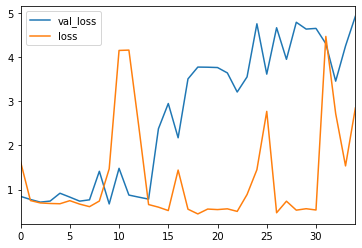

In [65]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [66]:
predictions = model.predict_classes(test)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(test_target, predictions)

array([[23, 27],
       [32, 22]], dtype=int64)

# TRY3

In [69]:
from keras import Model
from keras.layers import Lambda, Input, Dropout, Flatten, LSTM, Dense

In [70]:
n_timesteps=60
n_features=4
n_outputs=1

In [71]:
# Input
x = Input((n_timesteps, n_features))

# LSTM
lstm_1 = LSTM(150, activation='relu', input_shape=(n_timesteps, n_features))(x)
lstm_2 = Dropout(0.5)(lstm_1)
lstm_3 = Dense(150, activation='relu')(lstm_2)
lstm_4 = Dense(n_outputs, activation='softmax', name='lstm_out')(lstm_3)

In [72]:
model=Model(x, 
           lstm_4,
           name="my_model")

In [73]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 4)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 150)               93000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               22650     
_________________________________________________________________
lstm_out (Dense)             (None, 1)                 151       
Total params: 115,801
Trainable params: 115,801
Non-trainable params: 0
_________________________________________________________________


In [75]:
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [76]:
min_delta_val = 0.01
lr_cb = ReduceLROnPlateau(monitor = 'val_auc', mode='max', 
                          factor = 0.5, min_delta = min_delta_val, patience = 3, verbose = 1)
es_cb = EarlyStopping(monitor = 'val_auc', mode='max', 
                      min_delta=min_delta_val, patience = 10, verbose = 1, restore_best_weights = True)

default_callbacks = [lr_cb, es_cb]

In [77]:
train_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [78]:
epochs=200
batch_size=1000
validation_split_on_training = 0.2
# train model
model.fit(train,
          train_target, epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation, validation_target),
          #validation_split=validation_split_on_training,
          verbose=True,
          callbacks=default_callbacks)

Train on 106 samples, validate on 104 samples
Epoch 1/200
106/106 [==============================] - 1s 10ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 2/200


c:\python36\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_auc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
c:\python36\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


106/106 [==============================] - 0s 2ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/200
106/106 [==============================] - 0s 2ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 4/200
106/106 [==============================] - 0s 2ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 5/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 6/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 7/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 8/200
106/106 [==============================] - 0s 2ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 9/200

106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 60/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 61/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 62/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 63/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 64/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 65/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch

Epoch 116/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 117/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 118/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 119/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 120/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 121/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 122/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_ac

Epoch 173/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 174/200
106/106 [==============================] - 0s 2ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 175/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 176/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 177/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 178/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 179/200
106/106 [==============================] - 0s 3ms/step - loss: 7.8113 - accuracy: 0.4906 - val_loss: 7.6666 - val_ac

In [79]:
model.history.history

{'val_loss': [7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
  7.666618824005127,
 

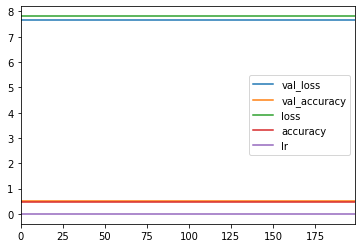

In [80]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()